In [2]:
!pip install pytesseract


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import os
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
from timeit import default_timer as timer
import cv2
import pytesseract
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader,random_split
from torchvision import transforms, datasets

In [60]:
import pandas as pd

In [61]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [62]:
walk_through_dir(r"C:\Users\thars\Downloads\data")

There are 657 directories and 0 images in 'C:\Users\thars\Downloads\data'.
There are 0 directories and 59 images in 'C:\Users\thars\Downloads\data\000'.
There are 0 directories and 2 images in 'C:\Users\thars\Downloads\data\001'.
There are 0 directories and 1 images in 'C:\Users\thars\Downloads\data\002'.
There are 0 directories and 2 images in 'C:\Users\thars\Downloads\data\003'.
There are 0 directories and 1 images in 'C:\Users\thars\Downloads\data\004'.
There are 0 directories and 2 images in 'C:\Users\thars\Downloads\data\005'.
There are 0 directories and 1 images in 'C:\Users\thars\Downloads\data\006'.
There are 0 directories and 2 images in 'C:\Users\thars\Downloads\data\007'.
There are 0 directories and 2 images in 'C:\Users\thars\Downloads\data\008'.
There are 0 directories and 2 images in 'C:\Users\thars\Downloads\data\009'.
There are 0 directories and 2 images in 'C:\Users\thars\Downloads\data\010'.
There are 0 directories and 2 images in 'C:\Users\thars\Downloads\data\011'.


In [63]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [64]:
from pathlib import Path

path = Path(r"C:\Users\thars\Downloads")
data_path = path / "data"


Random Image Path : C:\Users\thars\Downloads\data\213\e01-062.png
Image Class : 213
Image Height : 3542
Image Width : 2479


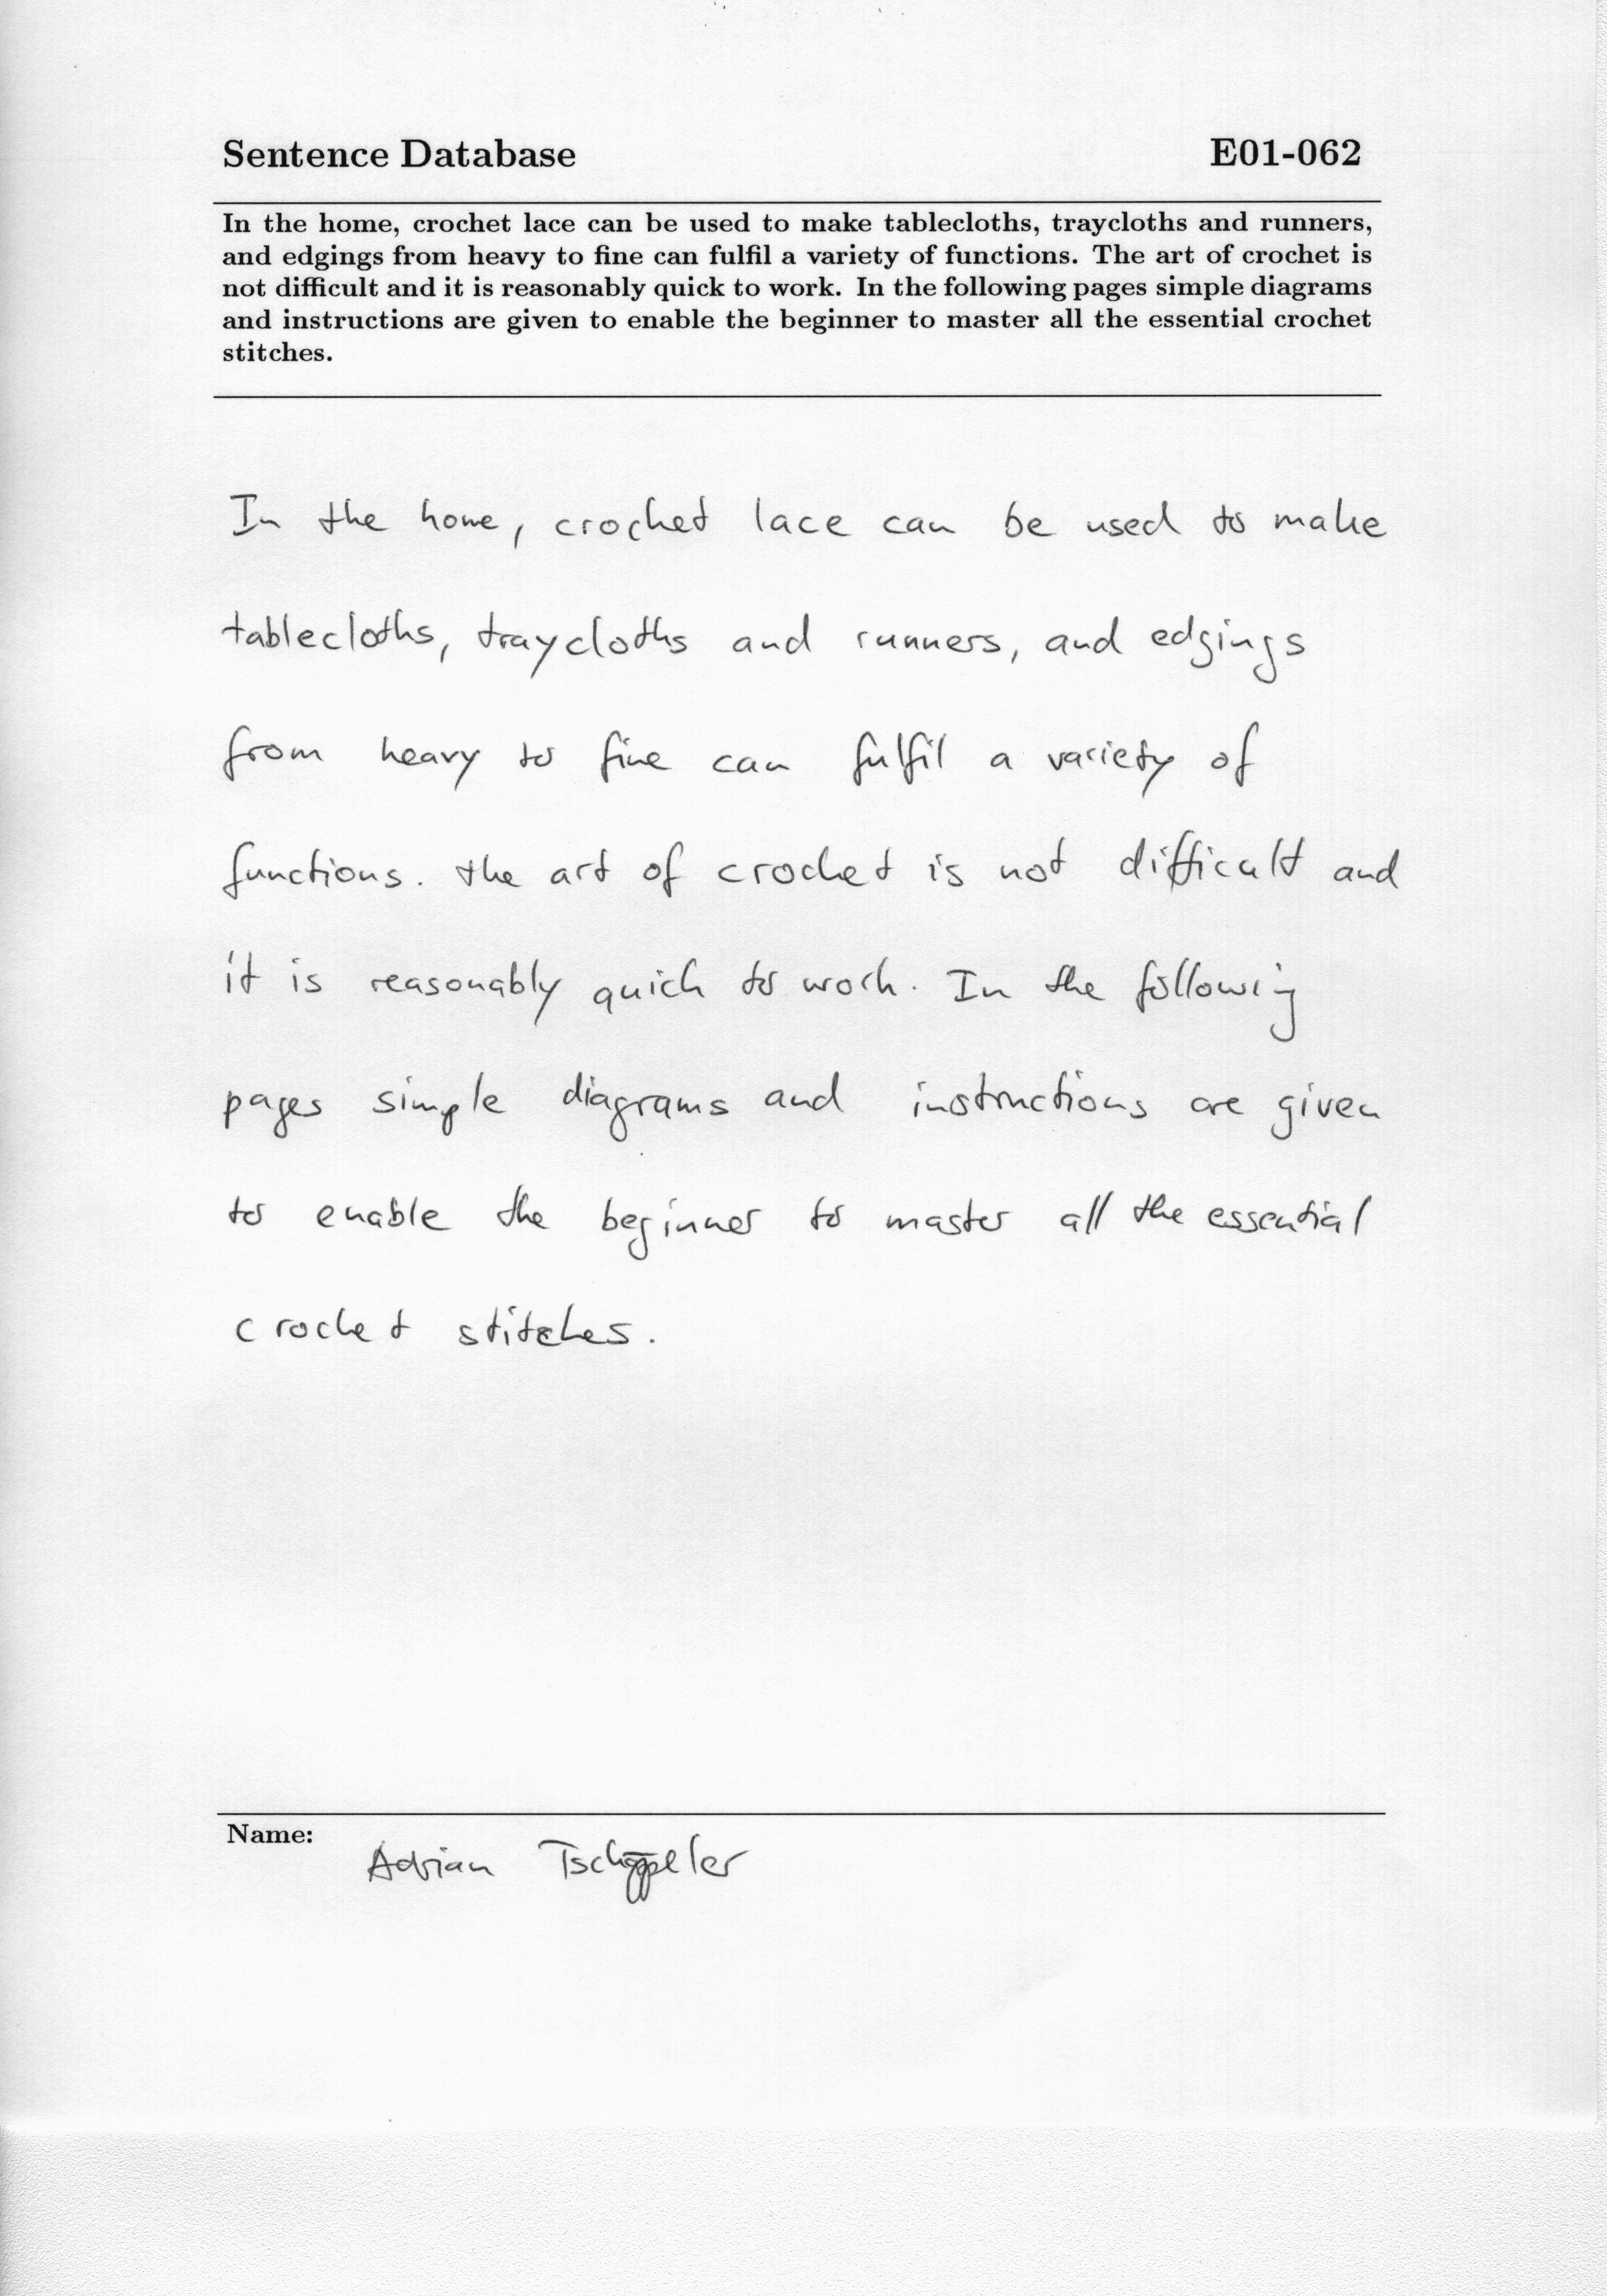

In [65]:
image_path_list = list(data_path.glob("*/*"))
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random Image Path : {random_image_path}")
print(f"Image Class : {image_class}")
print(f"Image Height : {img.height}")
print(f"Image Width : {img.width}")
img

In [66]:
image_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels = 1),
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])
image_transforms

Compose(
    Grayscale(num_output_channels=1)
    Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

In [67]:
def plot_transformed_image(image_paths,transform,n=3,seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths,k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original Size : {f.size}")
            ax[0].axis(False)
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nsize : {transformed_image.shape}")
            ax[1].axis(False)
            
            fig.suptitle(f"Class : {image_path.parent.stem}",fontsize = 16)

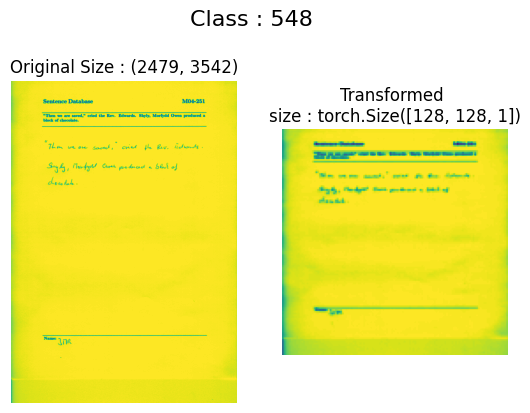

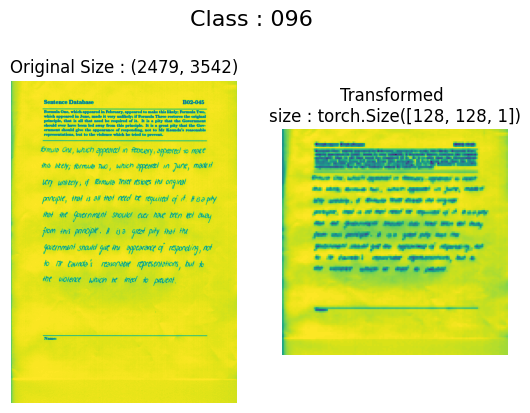

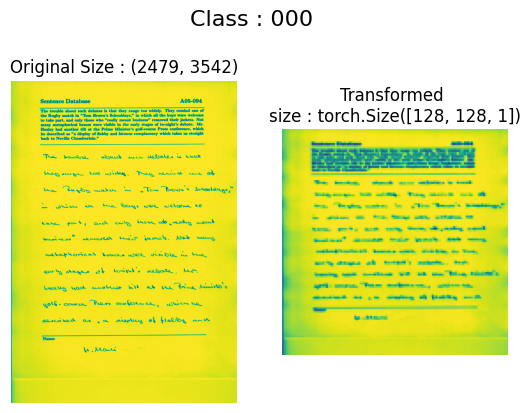

In [68]:
plot_transformed_image(image_path_list,image_transforms)

In [69]:
from pathlib import Path

path = Path(r"C:\Users\thars\Downloads")  # Adjust this to your actual directory
data_path = path / "data"  # Adjust to your dataset's location
print(data_path)


C:\Users\thars\Downloads\data


In [70]:
import os
from pathlib import Path

data_path = Path(r"C:\Users\thars\Downloads\data")

if data_path.exists():
    for root, dirs, files in os.walk(data_path):
        print(f"Directory: {root}")
        for file in files:
            print(f"File: {file}")
else:
    print("Directory does not exist!")


Directory: C:\Users\thars\Downloads\data
Directory: C:\Users\thars\Downloads\data\000
File: a01-000u.png
File: a01-003u.png
File: a01-007u.png
File: a01-011u.png
File: a01-014u.png
File: a01-020u.png
File: a01-026u.png
File: a01-030u.png
File: a01-043u.png
File: a01-049u.png
File: a01-049x.png
File: a01-053u.png
File: a01-058u.png
File: a01-063u.png
File: a01-068u.png
File: a01-072u.png
File: a01-077u.png
File: a01-082u.png
File: a01-087u.png
File: a01-091u.png
File: a01-096u.png
File: a01-102u.png
File: a01-107u.png
File: a01-113u.png
File: a01-117u.png
File: a01-122u.png
File: a01-128u.png
File: a01-132u.png
File: a01-132x.png
File: a03-050.png
File: a03-071.png
File: a03-073.png
File: a03-080.png
File: a03-089.png
File: a05-000.png
File: a05-013.png
File: a05-017.png
File: a05-022.png
File: a05-025.png
File: a05-029.png
File: a05-039.png
File: a05-044.png
File: a05-048.png
File: a05-053.png
File: a05-058.png
File: a05-062.png
File: a05-069.png
File: a05-073.png
File: a05-080.png
Fil

In [71]:
import os
from pathlib import Path

data_path = Path(r"C:\Users\thars\Downloads\data")

for subdir in data_path.iterdir():
    if subdir.is_dir():
        images = list(subdir.glob("*.png"))
        print(f"Class: {subdir.name}, Number of Images: {len(images)}")


Class: 000, Number of Images: 59
Class: 001, Number of Images: 2
Class: 002, Number of Images: 1
Class: 003, Number of Images: 2
Class: 004, Number of Images: 1
Class: 005, Number of Images: 2
Class: 006, Number of Images: 1
Class: 007, Number of Images: 2
Class: 008, Number of Images: 2
Class: 009, Number of Images: 2
Class: 010, Number of Images: 2
Class: 011, Number of Images: 2
Class: 012, Number of Images: 2
Class: 013, Number of Images: 3
Class: 014, Number of Images: 2
Class: 015, Number of Images: 1
Class: 016, Number of Images: 3
Class: 017, Number of Images: 3
Class: 018, Number of Images: 2
Class: 019, Number of Images: 3
Class: 020, Number of Images: 1
Class: 021, Number of Images: 1
Class: 022, Number of Images: 1
Class: 023, Number of Images: 1
Class: 024, Number of Images: 1
Class: 025, Number of Images: 5
Class: 026, Number of Images: 5
Class: 027, Number of Images: 1
Class: 028, Number of Images: 1
Class: 029, Number of Images: 1
Class: 030, Number of Images: 1
Class: 

Training dataset size: 1225
Validation dataset size: 306


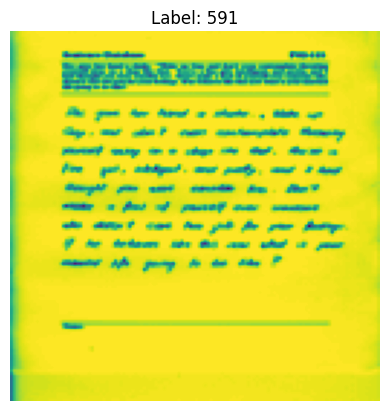

In [73]:
import os
import random
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import numpy as np
import cv2

from pathlib import Path
import matplotlib.pyplot as plt

# Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        """
        Args:
            data_dir (string): Directory with all the images arranged in subfolders (class names).
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        
        # Traverse the directory to gather images and their corresponding labels
        for label, class_folder in enumerate(os.listdir(data_dir)):
            class_path = os.path.join(data_dir, class_folder)
            if os.path.isdir(class_path):
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    if img_path.endswith(('.jpg', '.jpeg', '.png')):
                        self.image_paths.append(img_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path)
        
        # Apply transformations if any
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Directory path to your data (make sure it's correct)
data_path = Path(r"C:\Users\thars\Downloads\data")

# Define transformations (e.g., resizing, normalization)
image_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Create the dataset
dataset = CustomImageDataset(data_dir=data_path, transform=image_transforms)

# Splitting into training and validation sets (80% train, 20% validation)
val_size = int(0.2 * len(dataset))
train_size = len(dataset) - val_size

train_subset, val_subset = random_split(dataset, [train_size, val_size])

# Create DataLoaders for training and validation sets
train_dataloader = DataLoader(train_subset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_subset, batch_size=32, shuffle=False)

# Print dataset size
print(f"Training dataset size: {len(train_subset)}")
print(f"Validation dataset size: {len(val_subset)}")

# Example of visualizing a sample image from the training data
image, label = train_subset[0]  # Get the first image in the training set
plt.imshow(image.permute(1, 2, 0))  # Convert tensor to image format (C, H, W) to (H, W, C)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


In [74]:

def preprocess_image(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    image_array = np.array(image)
    
    gray_image = cv2.cvtColor(image_array,cv2.COLOR_RGB2GRAY)
    
    _,thresh_image = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return thresh_image

def extract_text_from_image(image):
    preprocessed_image = preprocess_image(image)
    pil_image = Image.fromarray(preprocessed_image)
    text = pytesseract.image_to_string(pil_image,config='--psm 11')
    return text.strip()

In [75]:
import pytesseract




In [77]:
image

tensor([[[0.8902, 0.9137, 0.9373,  ..., 0.9608, 0.9608, 0.9451],
         [0.8863, 0.9137, 0.9412,  ..., 0.9647, 0.9608, 0.9490],
         [0.8745, 0.9137, 0.9451,  ..., 0.9647, 0.9608, 0.9529],
         ...,
         [0.7412, 0.8549, 0.9059,  ..., 0.9608, 0.9608, 0.9569],
         [0.7373, 0.8549, 0.9059,  ..., 0.9608, 0.9608, 0.9569],
         [0.7373, 0.8549, 0.9020,  ..., 0.9647, 0.9608, 0.9608]]])

In [78]:
class HandWritingRNN(nn.Module):
    def __init__(self,
                input_shape : int,
                hidden_units : int,
                output_shape : int,
                num_layers : int = 1):
        super(HandWritingRNN,self).__init__()
        self.hidden_units = hidden_units
        self.num_layers = num_layers
        self.RNN = nn.LSTM(input_shape,
                          hidden_units,
                          num_layers,
                          batch_first = True)
        self.FC = nn.Linear(hidden_units,
                           output_shape)
    def forward(self,x,hidden):
        out,hidden = self.RNN(x,hidden)
        out = self.FC(out)
        return out,hidden
    
    def init_hidden(self,batch_size,device):
        return (torch.zeros(self.num_layers,batch_size,self.hidden_units,device = device),
               torch.zeros(self.num_layers,batch_size,self.hidden_units,device = device))

In [79]:
def train_step(model :torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              optimizer : torch.optim.Optimizer,
              device : torch.device):
    model.train()
    train_loss = 0.0 
    
    for X,_ in dataloader:
        X = X.to(device)
        
        batch_size,channels,height,width = X.size()
        X = X.view(batch_size,-1) # Flatting Image
        X = X.unsqueeze(1) # Adding Sequence Dimension
        
        hidden = model.init_hidden(X.size(0),device)
        
        optimizer.zero_grad()
        
        outputs, _ = model(X,hidden)
        
        outputs = outputs.squeeze(1) 
        targets = X.view(X.size(0),-1) # flatting the targets
        
        loss = loss_fn(outputs , targets)
        
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
    return train_loss / len(dataloader)

In [80]:
def test_step(model : torch.nn.Module,
             dataloader : torch.utils.data.DataLoader,
             loss_fn : torch.nn.Module,
             device = torch.device):
    model.eval()
    test_loss = 0.0 
    with torch.inference_mode():
        for X,_ in dataloader:
            X = X.to(device)
            
            batch_size,channels,height,width = X.size()
            X = X.view(batch_size,-1)
            X = X.unsqueeze(1)
            
            hidden = model.init_hidden(X.size(0),device)
            
            outputs, _ = model(X, hidden)

            # Flatten outputs and targets
            outputs = outputs.squeeze(1)  # Remove sequence dimension
            targets = X.view(X.size(0), -1)  # Flatten targets

            loss = loss_fn(outputs, targets)
            test_loss += loss.item()
    return test_loss / len(dataloader)

In [81]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          val_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          device: torch.device,
          epochs: int = 5):
    model.to(device)
    results = {"train_loss": [],
               "val_loss": []}
    
    for epoch in range(epochs):
        train_loss = train_step(model, train_dataloader, loss_fn, optimizer, device)
        val_loss = test_step(model, val_dataloader, loss_fn, device)
        
        print(f"Epoch: {epoch + 1} | train_loss: {train_loss:.3f} | val_loss: {val_loss:.3f}")
        results["train_loss"].append(train_loss)
        results["val_loss"].append(val_loss)
    
    return results

In [82]:
input_shape = 128*128
output_shape = input_shape
hidden_units = 256
num_layers = 2
model = HandWritingRNN(input_shape = input_shape,
                      output_shape = output_shape,
                      hidden_units = hidden_units,
                      num_layers = num_layers)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.002)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = timer()

model_results = train(model, train_dataloader, val_dataloader, optimizer, loss_fn, epochs=30, device=device)

end_time = timer()

print(f"Total Training Time : {end_time - start_time:.3f}seconds")

Epoch: 1 | train_loss: 0.134 | val_loss: 0.008
Epoch: 2 | train_loss: 0.004 | val_loss: 0.002
Epoch: 3 | train_loss: 0.002 | val_loss: 0.002
Epoch: 4 | train_loss: 0.002 | val_loss: 0.002
Epoch: 5 | train_loss: 0.002 | val_loss: 0.002
Epoch: 6 | train_loss: 0.002 | val_loss: 0.002
Epoch: 7 | train_loss: 0.002 | val_loss: 0.002
Epoch: 8 | train_loss: 0.002 | val_loss: 0.002
Epoch: 9 | train_loss: 0.002 | val_loss: 0.002
Epoch: 10 | train_loss: 0.002 | val_loss: 0.002
Epoch: 11 | train_loss: 0.002 | val_loss: 0.002
Epoch: 12 | train_loss: 0.002 | val_loss: 0.002
Epoch: 13 | train_loss: 0.002 | val_loss: 0.003
Epoch: 14 | train_loss: 0.002 | val_loss: 0.002
Epoch: 15 | train_loss: 0.002 | val_loss: 0.002
Epoch: 16 | train_loss: 0.002 | val_loss: 0.002
Epoch: 17 | train_loss: 0.002 | val_loss: 0.002
Epoch: 18 | train_loss: 0.002 | val_loss: 0.002
Epoch: 19 | train_loss: 0.002 | val_loss: 0.002
Epoch: 20 | train_loss: 0.002 | val_loss: 0.002
Epoch: 21 | train_loss: 0.002 | val_loss: 0.002
E

In [83]:
import torch.nn.functional as F
def sample(predictions, temperature=1.0):
    predictions = predictions / temperature
    probabilities = F.softmax(predictions, dim=-1)
    return torch.multinomial(probabilities, 1).item()

In [84]:
import torch.nn.functional as F
def generate_text(model, seed_text, max_length, device, temperature=1.0):
    model.eval()
    generated_text = seed_text
    
    # Converting Textv into tensor
    seed_tensor = torch.tensor([ord(char) for char in seed_text], dtype=torch.float32).unsqueeze(0).to(device)

    if seed_tensor.size(-1) < 16384:
        padding_size = 16384 - seed_tensor.size(-1)
        seed_tensor = F.pad(seed_tensor, (0, padding_size), 'constant', 0)
    else:
        seed_tensor = seed_tensor[:, :16384]
    
    seed_tensor = seed_tensor.unsqueeze(1)  

    hidden = model.init_hidden(seed_tensor.size(0), device)

    print(f"Initial seed_tensor shape: {seed_tensor.shape}")
    print(f"Initial Hidden state shape: {hidden[0].shape}, {hidden[1].shape}")

    with torch.no_grad():
        for _ in range(max_length):
            output, hidden = model(seed_tensor, hidden)

            output = output.squeeze(1) 
            predictions = output[-1] 

            predicted_char_index = sample(predictions, temperature)
            predicted_char = chr(predicted_char_index)
            generated_text += predicted_char

            # Update seed tensor with the new character
            new_char_tensor = torch.tensor([ord(predicted_char)], dtype=torch.float32).unsqueeze(0).to(device)
            new_char_tensor = F.pad(new_char_tensor, (0, 16384 - new_char_tensor.size(-1)), 'constant', 0)
            new_char_tensor = new_char_tensor.unsqueeze(1)

            # Slide the window to include the new character
            seed_tensor = torch.cat((seed_tensor[:, 1:, :], new_char_tensor), dim=1)

    return generated_text

In [85]:
from PIL import Image
import pytesseract

def extract_text_from_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    
    # Use pytesseract to extract text
    extracted_text = pytesseract.image_to_string(img)
    return extracted_text


In [57]:
# Assuming your image path is 'image.jpg' and the model is already loaded
image_path = r"C:\Users\thars\Downloads\data\010\a01-030x.png"

# Extract text from the image
extracted_text = extract_text_from_image(image_path)

# Use the extracted text as seed for text generation
generated_text = generate_text(model, extracted_text, max_length=100, device='cpu', temperature=1.0)

print(generated_text)


Initial seed_tensor shape: torch.Size([1, 1, 16384])
Initial Hidden state shape: torch.Size([2, 1, 256]), torch.Size([2, 1, 256])
Sentence Database A01-030

Northern Rhodesia is a member of the Federation. Mr. Macleod was not at the
week-end meeting. But he told 0M Ps yesterday: ”I have no knowledge of secret
negotiations.” He said Britain had an obligation to consult the Federal Government.
But the final decision remained with the British Government. Mr. James Callaghan,
Labour’s Colonial spokesman, said Sir Roy had no right to delay progress in the talks
by refusing to sit round the conference table.

NovHheyn Rhodesia is aA member of the Fede _
vation. Mr. Macleod was nok at the week-end
meeting. But he fobL Off B yesterday: "/
have no knowledge of Secver negotiations. ” He
Saxck Britain hed an obligation be consult
Hx Fedeval Gevevnemenk, /tr- James Cllag han ,
La soor!s Clouel SprkeSman, ick Siv Roy had
no yah to delary progwess In He folles by

refusing fo Sik round Fhe confreng 

In [88]:
# Assuming your image path is 'image.jpg' and the model is already loaded
image_path = r"C:\Users\thars\Downloads\data\124\b06-004.png"

# Extract text from the image
extracted_text = extract_text_from_image(image_path)

# Use the extracted text as seed for text generation
generated_text = generate_text(model, extracted_text, max_length=100, device='cpu', temperature=1.0)

print(generated_text)

Initial seed_tensor shape: torch.Size([1, 1, 16384])
Initial Hidden state shape: torch.Size([2, 1, 256]), torch.Size([2, 1, 256])
Sentence Database B06-004

i a ee
” Without Britain’s tolerance German rearmament in the air would be jeopardised.”
When Hoesch’s reports, along with other nazi documents, were captured and pub-
lished after the war the pattern of British Government connivance became clear. At
nazi Germany’s request, Britain was providing the cloak for Germany to build an air
force bigger than that of France.

"Without Brifain's bleiance German tarma-
man inthe air Would be jasparclisec}." When
Hogsch's parts along with other nari clocoments
wiz captured and publishad after Ihe war the
patam o} British Goverment <nnivance heamg
clear AL naa) Gamany’ 3 quest, Bricin was
Providing dhz cloak for Germany te build an
ai force bigger than thet a) Han,

Name:
ൿඊⓢ㐭ᒉốᖺᒏ⎅ℾᝤ⯞ছ⧚⨢㴅Ⴈ㍈Ⰷ㤱ℑᙦħ㈮ႂā㩫ᨫ◫โ༂㍼㎏ᨇ㔻੧ㆪⅲ㻻ࣳ᫁̚ᗛ㭐᳔㯿š⁥ⱍ㤕ჯ㞀᳿ᯋ᏷⭢㳮ᠹ〾ᐽへ㛥ʱ⫝⸉㢟ᐑ⴩ᡦ⒵Ɓࣖ€㜵ఀཞಇჯ⸂ਲ⦔Ƚ✞᳷᪐㵥㼻㍥⫅㞠㻊㰖㵃⻨ᨪトᡷౘᓃ⟣
